# **Proyek Akhir: Membuat Model Sistem Rekomendasi**
- **Nama:** Rebecca Olivia Javenka Br. Manurung
- **Email:** [rebeccaolivia1601@gmail.com]
- **ID Dicoding:** [rebeccaolivia]

---



# Data Loading

Tahap pertama dalam proses pembuatan model adalah **memuat data** yang akan digunakan. Pada bagian ini, dilakukan proses impor library dan pembacaan dataset agar data siap dianalisis dan diproses lebih lanjut.

---



## Import libraries


Bagian ini digunakan untuk mengimpor pustaka yang diperlukan dalam proyek.
Pustaka yang digunakan meliputi:

*   `pandas`, `numpy`: untuk manipulasi data.
*   `matplotlib.pyplot`, `seaborn`: untuk visualisasi data.
*   `re`, `TfidfVectorizer`, `cosine_similarity`: untuk pemrosesan teks dan perhitungan kemiripan antar produk.
*   `train_test_split`: untuk membagi data latih dan data uji.
*   `tensorflow` dan `keras`: untuk membangun model rekomendasi dengan pendekatan neural network.
*   `kagglehub`: untuk mengunduh dataset dari Kaggle secara langsung.
*   `Path`: untuk pengelolaan path file.

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kagglehub
from pathlib import Path

## Load the dataset

Pada bagian ini, dapat mengunduh dan memuat dataset dari Kaggle. Dataset yang digunakan berisi informasi terkait penjualan dan ulasan produk di Amazon.


---







In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-sales-dataset


Baris ini menggunakan `kagglehub` untuk mengunduh dataset *Amazon Sales Dataset* dari repositori Kaggle. Setelah berhasil diunduh, path dari dataset disimpan dalam variabel `path`.

In [3]:
amazon = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')

Dataset yang sudah diunduh kemudian dibaca menggunakan `pandas.read_csv()` dan disimpan ke dalam variabel `amazon` agar bisa digunakan untuk proses analisis dan pembuatan model.



In [4]:
amazon.head()
pd.set_option('display.max_columns', None)
amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

Bagian ini menampilkan beberapa baris pertama dari dataset untuk melihat isi dan struktur datanya. `pd.set_option('display.max_columns', None)` digunakan agar semua kolom dapat ditampilkan secara lengkap, sehingga bisa melihat informasi data tanpa terpotong.

---

Output kode di atas memberikan informasi sebagai berikut:

*   **Jumlah Baris:** Terdapat 1465 baris dalam dataset.
*   **Jumlah Kolom:** Terdapat 16 kolom, yaitu:
    *   `product_id`
    *   `product_name`
    *   `category`
    *   `discounted_price`
    *   `actual_price`
    *   `discount_percentage`
    *   `rating`
    *   `rating_count`
    *   `about_product`
    *   `user_id`
    *   `user_name`
    *   `review_id`
    *   `review_title`
    *   `review_content`
    *   `img_link`
    *   `product_link`

In [5]:
print('Jumlah data produk:', len(amazon.product_id.unique()))
print('Jumlah data user:', len(amazon.user_id.unique()))
print('Jumlah data review:', len(amazon.review_id.unique()))

Jumlah data produk: 1351
Jumlah data user: 1194
Jumlah data review: 1194


Baris kode ini digunakan untuk melihat jumlah unik dari dataset, yaitu:

*   `product_id`: menunjukkan jumlah produk yang berbeda.
*   `user_id`: menunjukkan jumlah pengguna unik.
*   `review_id`: menunjukkan jumlah ulasan yang tersedia.

Informasi ini penting untuk memahami cakupan data yang dimiliki dalam membangun sistem rekomendasi.

---

Berdasarkan output di atas, diperoleh informasi sebagai berikut:

*   **Jumlah data produk:** Terdapat 1351 produk unik dalam dataset `amazon`.
*   **Jumlah data user:** Terdapat 1194 pengguna unik dalam dataset `amazon`.
*   **Jumlah data review:** Terdapat 1194 ulasan unik dalam dataset `amazon`.

Informasi ini menunjukkan bahwa ada lebih banyak produk daripada pengguna dan ulasan, dan jumlah pengguna unik sama dengan jumlah ulasan unik.

# Data Understanding

Bagian ini bertujuan untuk memahami struktur, tipe data, kualitas data, serta informasi penting dari dataset yang digunakan sebelum dilakukan analisis atau pembuatan model sistem rekomendasi.



---



## Informasi dataset

Menampilkan struktur dan tipe data dari setiap kolom dalam dataset. Informasi ini penting untuk mengetahui apakah ada tipe data yang perlu dikonversi agar sesuai untuk analisis atau pemodelan selanjutnya.


---



In [6]:
# Menampilkan info dataset
print("="*50 + " Dataset Info " + "="*50)

amazon.info()

================================================== Dataset Info ==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   o

Dari output `amazon.info()` di atas, dapat melihat ringkasan struktur dan tipe data dari dataset. Terlihat bahwa sebagian besar kolom memiliki tipe data `object`. Ini kurang ideal, terutama untuk kolom-kolom seperti `discounted_price`, `actual_price`, `discount_percentage`, `rating`, dan `rating_count`, yang seharusnya merupakan nilai numerik. Kolom-kolom ini perlu diubah ke tipe data yang sesuai agar dapat digunakan dalam analisis dan pemodelan lebih lanjut. Selain itu, terdapat 1465 baris data dengan 16 kolom, dan terlihat ada 2 nilai yang hilang pada kolom `rating_count`.

In [7]:
# Mengubah kolom 'discounted_price' menjadi tipe data float64
# Menghapus karakter '₹' dan ',' kemudian mengubah tipe data menjadi float
amazon['discounted_price'] = amazon['discounted_price'].str.replace("₹",'').str.replace(",",'').astype('float64')

# Mengubah kolom 'actual_price' menjadi tipe data float64
# Menghapus karakter '₹' dan ',' kemudian mengubah tipe data menjadi float
amazon['actual_price'] = amazon['actual_price'].str.replace("₹",'').str.replace(",",'').astype('float64')

# Mengubah kolom 'discount_percentage' menjadi tipe data float64
# Menghapus karakter '%' kemudian mengubah tipe data menjadi float dan membagi dengan 100
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','').astype('float64') / 100

# Menampilkan info dataset setelah perubahan tipe data
print("="*50 + " Dataset Info After Type Conversion " + "="*50)
amazon.info()

================================================== Dataset Info After Type Conversion ==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  r

Setelah melakukan konversi tipe data, output `amazon.info()` menunjukkan bahwa kolom `discounted_price`, `actual_price`, dan `discount_percentage` sekarang memiliki tipe data `float64`, sesuai dengan yang diharapkan. Kolom-kolom lainnya masih bertipe `object` dan mungkin memerlukan penanganan lebih lanjut tergantung pada analisis atau pemodelan yang akan dilakukan.

## Null Check

Langkah ini digunakan untuk mendeteksi nilai yang hilang (missing values) dalam dataset. Ini penting untuk memastikan kualitas data. Data yang hilang bisa mengganggu proses pelatihan model dan perlu ditangani terlebih dahulu.



---



In [8]:
# Cek missing values
print("\n" + "="*50 + " Missing Values " + "="*50)
print(amazon.isnull().sum())


================================================== Missing Values ==================================================
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Output di atas menampilkan jumlah nilai yang hilang (missing values) untuk setiap kolom dalam dataset `amazon`. Terlihat bahwa hanya kolom `rating_count` yang memiliki nilai yang hilang, yaitu sebanyak 2 data. Kolom-kolom lainnya tidak memiliki nilai yang hilang.

In [9]:
# Menghapus baris dengan nilai yang hilang pada kolom 'rating_count'
# inplace=True akan melakukan perubahan langsung pada DataFrame 'amazon'
amazon.dropna(subset=['rating_count'], inplace=True)

# Memeriksa kembali missing values setelah penghapusan
print("="*50 + " Missing Values After Dropping Rows " + "="*50)
print(amazon.isnull().sum())

================================================== Missing Values After Dropping Rows ==================================================
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Setelah menghapus baris-baris yang memiliki nilai kosong pada kolom `rating_count`, output di atas menunjukkan bahwa sekarang sudah tidak ada lagi *missing values* (nilai yang hilang) di seluruh kolom dalam dataset `amazon`. Ini menandakan bahwa data sudah bersih dari nilai-nilai yang hilang.

In [10]:
# Menampilkan jumlah kemunculan setiap nilai unik di kolom 'rating'
# Ini membantu mengidentifikasi nilai yang tidak biasa atau non-numerik
print("="*50 + " Value Counts for Rating Column " + "="*50)
print(amazon['rating'].value_counts())

================================================== Value Counts for Rating Column ==================================================
rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
4.8      3
5.0      2
3.2      2
2.8      2
3.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64


Output di atas menampilkan distribusi nilai unik dalam kolom `rating`. Terlihat sebagian besar rating berada dalam rentang yang diharapkan (misalnya 4.1, 4.3, dll.). Namun, teridentifikasi adanya satu nilai yang tidak biasa, yaitu '|'. Nilai ini perlu ditangani karena bukan merupakan representasi numerik dari rating.

In [11]:
# Menghitung jumlah baris yang mengandung karakter '|' pada kolom 'rating' sebelum penghapusan
count_before = amazon['rating'].astype(str).str.contains('\|').sum()
print(f"Jumlah baris yang mengandung '|' pada kolom 'rating' (Sebelum): {count_before}")

# Menghapus baris yang mengandung karakter '|' pada kolom 'rating'
# Menggunakan .astype(str) untuk memastikan operasi string dapat dilakukan
amazon = amazon[amazon['rating'].astype(str).apply(lambda x: '|' not in x)]

# Menghitung jumlah baris yang mengandung karakter '|' pada kolom 'rating' setelah penghapusan
count_after = amazon['rating'].astype(str).str.contains('\|').sum()
print(f"Jumlah baris yang mengandung '|' pada kolom 'rating' (Setelah): {count_after}")

Jumlah baris yang mengandung '|' pada kolom 'rating' (Sebelum): 1
Jumlah baris yang mengandung '|' pada kolom 'rating' (Setelah): 0


Output di atas menunjukkan bahwa sebelum penghapusan, terdapat 1 baris yang mengandung karakter '|' pada kolom `rating`. Setelah proses penghapusan dilakukan, jumlah baris yang mengandung karakter '|' menjadi 0. Ini mengkonfirmasi bahwa baris dengan nilai yang tidak biasa tersebut telah berhasil dihapus dari dataset `amazon`.

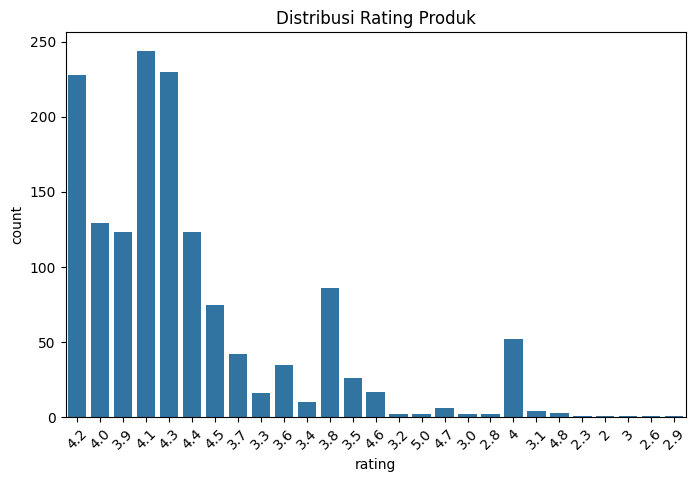

In [12]:
# Visualisasi distribusi rating
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=amazon)
plt.xticks(rotation=45)
plt.title('Distribusi Rating Produk')
plt.show()

Visualisasi ini menunjukkan sebaran nilai `rating ` dalam dataset. Ini penting untuk mengetahui apakah rating produk cenderung tinggi, rendah, atau merata, serta bisa jadi acuan dalam evaluasi produk.



In [13]:
amazon['rating'] = amazon['rating'].astype(str).str.replace(',','').astype('float64')
amazon['rating_count'] = amazon['rating_count'].astype(str).str.replace(',', '').astype('float64')

# Menampilkan info dataset setelah perubahan tipe data
print("="*50 + " Dataset Info After Rating and Rating Count Conversion " + "="*50)
amazon.info()

================================================== Dataset Info After Rating and Rating Count Conversion ==================================================
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   

<ipython-input-13-c5e7e13c891e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating'] = amazon['rating'].astype(str).str.replace(',','').astype('float64')
<ipython-input-13-c5e7e13c891e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating_count'] = amazon['rating_count'].astype(str).str.replace(',', '').astype('float64')


Setelah konversi, output `amazon.info()` menunjukkan bahwa kolom `rating` dan `rating_count` sekarang memiliki tipe data `float64`. Ini berarti kedua kolom tersebut sudah siap untuk diolah sebagai nilai numerik. Selain itu, terlihat jumlah total entri (baris) dalam dataset sekarang adalah 1462, yang mencerminkan penghapusan baris dengan nilai yang hilang atau tidak valid pada langkah *data cleaning* sebelumnya.

## Duplication Check

Pemeriksaan ini bertujuan untuk mendeteksi adanya baris duplikat di dataset. Duplikasi data bisa menyebabkan bias dalam model, sehingga perlu dicek dan dihindari.



---



In [14]:
# Memeriksa apakah ada baris yang sepenuhnya duplikat di dalam DataFrame amazon
# duplicated().any() akan mengembalikan True jika ada setidaknya satu baris duplikat
# dan False jika tidak ada
print("="*50 + " Duplication Check " + "="*50)
print("Apakah ada baris duplikat di dataset?", amazon.duplicated().any())

# Memeriksa apakah ada duplikasi berdasarkan subset kolom tertentu (semua kolom dalam kasus ini)
# Ini adalah cara lain untuk memastikan tidak ada duplikasi baris secara keseluruhan
columns_to_check = ['product_id', 'product_name', 'category', 'discounted_price',
                    'actual_price', 'discount_percentage', 'rating', 'rating_count',
                    'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
                    'review_content', 'img_link', 'product_link']
any_duplicates_subset = amazon.duplicated(subset=columns_to_check).any()

print("Apakah ada baris duplikat berdasarkan semua kolom?", any_duplicates_subset)

================================================== Duplication Check ==================================================
Apakah ada baris duplikat di dataset? False
Apakah ada baris duplikat berdasarkan semua kolom? False


Output di atas menunjukkan bahwa pemeriksaan duplikasi pada dataset `amazon` menghasilkan `False` untuk kedua kondisi (memeriksa duplikasi penuh dan berdasarkan subset semua kolom). Ini berarti tidak ada baris yang sepenuhnya duplikat dalam dataset, mengkonfirmasi bahwa data bebas dari duplikasi penuh.

## Rating Weight
Kolom `rating_weighted` dibuat untuk memberi bobot pada rating berdasarkan jumlah ulasan.
Rumusnya: `rating * rating_count`.
Semakin banyak ulasan, semakin "berat" pengaruh rating tersebut dalam perhitungan rata-rata atau penilaian kualitas produk.

---



In [15]:
# Membuat kolom 'rating_weighted' dengan mengalikan kolom 'rating' dan 'rating_count'
# Kolom ini memberikan bobot pada rating berdasarkan jumlah ulasan
amazon.loc[:, 'rating_weighted'] = amazon['rating'] * amazon['rating_count']

# Menampilkan beberapa baris pertama dari kolom 'rating_weighted' untuk verifikasi
display(amazon[['product_name', 'rating', 'rating_count', 'rating_weighted']].head())

amazon.rating_weighted

<ipython-input-15-ab7377753e87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.loc[:, 'rating_weighted'] = amazon['rating'] * amazon['rating_count']


,product_name,rating,rating_count,rating_weighted
0,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24269.0,101929.8
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,43994.0,175976.0
2,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,7928.0,30919.2
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,94363.0,396324.6
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,16905.0,71001.0


,rating_weighted
0,101929.8
1,175976.0
2,30919.2
3,396324.6
4,71001.0
...,...
1460,4360.0
1461,16883.8
1462,1684.8
1463,32124.0


Output di atas menampilkan beberapa baris pertama dari DataFrame setelah penambahan kolom `rating_weighted`, serta seluruh nilai dalam kolom `rating_weighted`. Kolom baru ini merupakan hasil perkalian antara `rating` produk dengan `rating_count`.

Nilai `rating_weighted` mencerminkan rating produk yang diberi bobot berdasarkan seberapa banyak ulasan yang diterima. Nilai yang lebih tinggi pada kolom ini mengindikasikan produk yang tidak hanya memiliki rating rata-rata yang baik, tetapi juga populer dan banyak diulas oleh pengguna. Ini adalah metrik yang berguna untuk mengidentifikasi produk unggulan yang didukung oleh banyak testimoni pelanggan.

## Pemisahan Kategori

Pemisahan kategori akan memudahkan dalam analisis dan visualisasi data, serta dapat digunakan sebagai fitur untuk model rekomendasi berbasis konten.

---



In [16]:
# Mengekstrak sub-kategori dari kolom 'category'
# Mengambil bagian terakhir setelah memisahkan string berdasarkan karakter '|'
amazon.loc[:, 'sub_category'] = amazon['category'].astype(str).str.split('|').str[-1]

# Mengekstrak kategori utama dari kolom 'category'
# Mengambil bagian pertama setelah memisahkan string berdasarkan karakter '|'
amazon.loc[:, 'main_category'] = amazon['category'].astype(str).str.split('|').str[0]

amazon[['main_category','sub_category']]

<ipython-input-16-ae8dfcb47c0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.loc[:, 'sub_category'] = amazon['category'].astype(str).str.split('|').str[-1]
<ipython-input-16-ae8dfcb47c0f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.loc[:, 'main_category'] = amazon['category'].astype(str).str.split('|').str[0]


,main_category,sub_category
0,Computers&Accessories,USBCables
1,Computers&Accessories,USBCables
2,Computers&Accessories,USBCables
3,Computers&Accessories,USBCables
4,Computers&Accessories,USBCables
...,...,...
1460,Home&Kitchen,WaterPurifierAccessories
1461,Home&Kitchen,Rice&PastaCookers
1462,Home&Kitchen,HeatConvectors
1463,Home&Kitchen,ExhaustFans


Output di atas menampilkan beberapa baris pertama dari DataFrame setelah penambahan kolom `main_category` dan `sub_category`. Kolom-kolom ini dihasilkan dari pemisahan string pada kolom `category` berdasarkan karakter `|`.

*   `main_category`: Berisi kategori utama produk (bagian pertama dari string kategori).
*   `sub_category`: Berisi sub-kategori produk (bagian terakhir dari string kategori).

Pemisahan ini bertujuan untuk memudahkan analisis dan penggunaan informasi kategori secara lebih terperinci.

# Explanatory Data Analysis (EDA)

Bagian ini bertujuan untuk memahami struktur, tipe data, kualitas data, serta informasi penting dari dataset yang digunakan sebelum dilakukan analisis atau pembuatan model sistem rekomendasi. Melalui EDA, dapat mengidentifikasi pola, tren, atau anomali yang ada dalam data, yang kemudian akan membantu dalam proses *feature engineering*, pemilihan model, dan interpretasi hasil.


---



================================================== Main Category Distribution ==================================================
10 Kategori Utama Teratas:


,Kategori Utama,Jumlah Produk
0,Electronics,526
1,Computers&Accessories,451
2,Home&Kitchen,447
3,OfficeProducts,31
4,MusicalInstruments,2
5,HomeImprovement,2
6,Toys&Games,1
7,Car&Motorbike,1
8,Health&PersonalCare,1


<ipython-input-17-37975c736aa7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=main_category_counts.index, x=main_category_counts.values, palette='viridis')


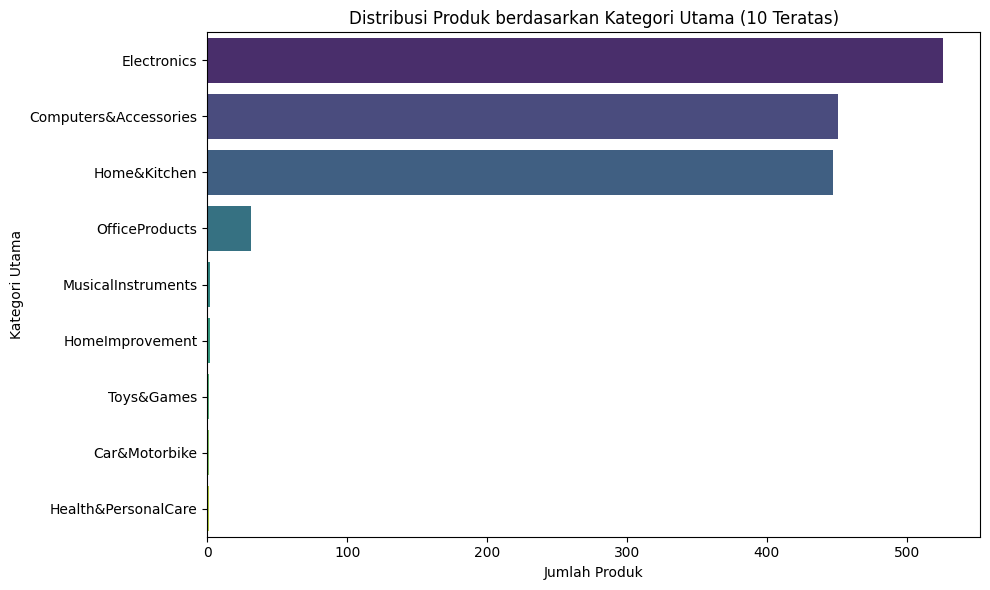

In [17]:
# Analisis distribusi produk berdasarkan kategori utama
print("="*50 + " Main Category Distribution " + "="*50)

# Menghitung jumlah produk per kategori utama dan memilih 10 teratas
main_category_counts = amazon['main_category'].value_counts().head(10)

# Menampilkan 10 kategori utama teratas beserta jumlah produknya
print('10 Kategori Utama Teratas:')
display(pd.DataFrame({'Kategori Utama': main_category_counts.index, 'Jumlah Produk': main_category_counts.values}))

# Visualisasi: Distribusi 10 Kategori Utama Teratas
plt.figure(figsize=(10, 6))
# Membuat bar plot dari 10 kategori utama teratas
sns.barplot(y=main_category_counts.index, x=main_category_counts.values, palette='viridis')
plt.title('Distribusi Produk berdasarkan Kategori Utama (10 Teratas)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Utama')
plt.tight_layout()
plt.show()

Output di atas menampilkan hasil analisis distribusi produk berdasarkan kategori utama:
*   **Tabel "10 Kategori Utama Teratas":**  Tabel ini menunjukkan sepuluh kategori utama dengan jumlah produk terbanyak. Dari hasilnya terlihat bahwa:
   * **Electronics** menempati posisi pertama dengan **526 produk**, menunjukkan dominasi kategori ini dalam dataset.
   * **Computers & Accessories** menyusul dengan **451 produk**, diikuti oleh **Home & Kitchen** dengan **447 produk**.
   * Tujuh kategori lainnya memiliki jumlah produk yang jauh lebih sedikit, bahkan beberapa seperti **Toys & Games**, **Car & Motorbike**, dan **Health & Personal Care** hanya memiliki **1 produk** saja.

Dataset sangat didominasi oleh kategori teknologi dan rumah tangga, seperti **Electronics**, **Computers & Accessories**, dan **Home & Kitchen**.


================================================== Sub Category Distribution ==================================================
10 Sub-Kategori Teratas:


,Sub Kategori,Jumlah Produk
0,USBCables,231
1,SmartWatches,76
2,Smartphones,68
3,SmartTelevisions,63
4,In-Ear,52
5,RemoteControls,49
6,MixerGrinders,27
7,Mice,24
8,HDMICables,24
9,DryIrons,24


<ipython-input-18-0cc81c8145b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_category_counts.index, x=sub_category_counts.values, palette='viridis')


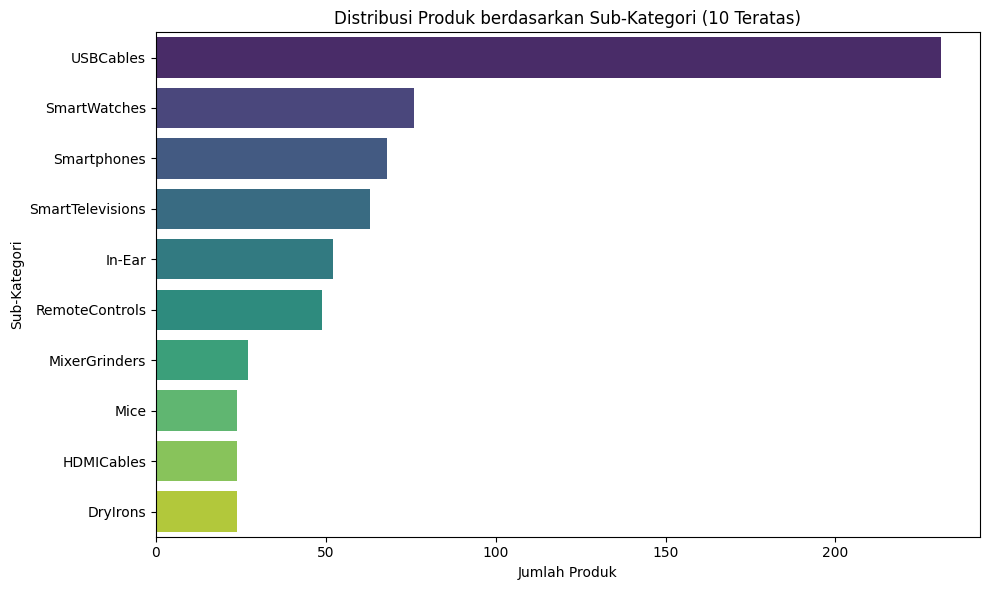

In [18]:
# Analisis distribusi produk berdasarkan sub-kategori
print("="*50 + " Sub Category Distribution " + "="*50)

# Menghitung jumlah produk per sub-kategori dan memilih 10 teratas
sub_category_counts = amazon['sub_category'].value_counts().head(10)

# Menampilkan 10 sub-kategori teratas beserta jumlah produknya
print('10 Sub-Kategori Teratas:')
display(pd.DataFrame({'Sub Kategori': sub_category_counts.index, 'Jumlah Produk': sub_category_counts.values}))

# Visualisasi: Distribusi 10 Sub-Kategori Teratas
plt.figure(figsize=(10, 6))
# Membuat bar plot dari 10 sub-kategori teratas
sns.barplot(y=sub_category_counts.index, x=sub_category_counts.values, palette='viridis')
plt.title('Distribusi Produk berdasarkan Sub-Kategori (10 Teratas)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Sub-Kategori')
plt.tight_layout()
plt.show()

Output di atas menampilkan hasil analisis distribusi produk berdasarkan sub-kategori:

*   **Tabel "10 Sub-Kategori Teratas":** Tabel menampilkan sepuluh sub-kategori dengan jumlah produk terbanyak:
   * **USB Cables** menjadi sub-kategori paling dominan dengan **231 produk**, menunjukkan tingginya jumlah produk kabel USB dalam dataset.
   * Sub-kategori lain yang juga cukup signifikan antara lain **Smart Watches (76)**, **Smartphones (68)**, dan **Smart Televisions (63)**.
   * Sisanya seperti **In-Ear**, **Remote Controls**, dan **Mixer Grinders** memiliki jumlah produk yang menurun secara bertahap, namun masih masuk ke dalam sepuluh besar.

Sub-kategori yang mendominasi cenderung berasal dari **produk elektronik dan aksesorinya**, khususnya kabel, jam tangan pintar, dan smartphone. Hal ini mendukung temuan sebelumnya bahwa dataset lebih banyak berisi produk-produk dari kategori **Electronics** dan **Computers & Accessories**.

================================================== Top 10 Main Categories by Average Rating ==================================================
10 Kategori Utama Teratas berdasarkan Rata-rata Rating:


,main_category,rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.155654
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


<ipython-input-19-c6ac90e8bc7d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_category', y='rating', data=top_main_categories_by_rating, palette='viridis')


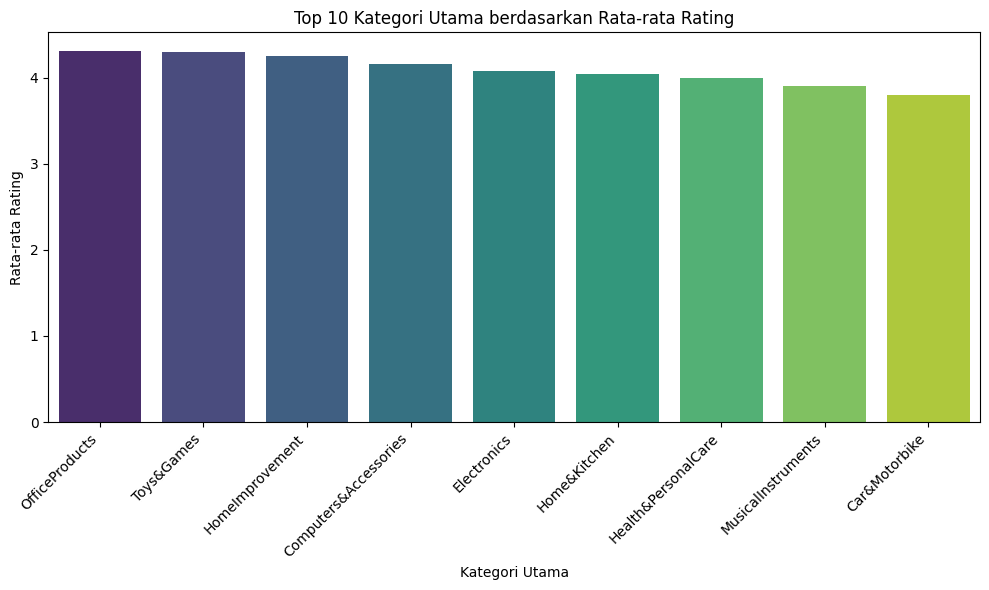

In [19]:
# Menghitung rata-rata rating untuk setiap kategori utama dan memilih 10 teratas
print("="*50 + " Top 10 Main Categories by Average Rating " + "="*50)

# Mengelompokkan data berdasarkan 'main_category', menghitung rata-rata 'rating', mengurutkan, dan mengambil 10 teratas
top_main_categories_by_rating = amazon.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Menampilkan tabel 10 kategori utama teratas berdasarkan rata-rata rating
print('10 Kategori Utama Teratas berdasarkan Rata-rata Rating:')
display(top_main_categories_by_rating)

# Visualisasi: Top 10 Kategori Utama berdasarkan Rata-rata Rating
plt.figure(figsize=(10, 6))
# Membuat bar plot dari 10 kategori utama teratas berdasarkan rata-rata rating
sns.barplot(x='main_category', y='rating', data=top_main_categories_by_rating, palette='viridis')
plt.xlabel('Kategori Utama') # Mengubah label x
plt.ylabel('Rata-rata Rating') # Mengubah label y
plt.title('Top 10 Kategori Utama berdasarkan Rata-rata Rating')
plt.xticks(rotation=45, ha='right') # Memutar label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Output di atas menunjukkan analisis rata-rata rating dari produk pada setiap kategori utama dalam dataset.

*   **Tabel "10 Kategori Utama Teratas berdasarkan Rata-rata Rating":** Tabel ini menampilkan sepuluh kategori utama dengan rata-rata rating tertinggi:
   * **Office Products** memiliki rata-rata rating tertinggi sebesar **4.31**, menunjukkan tingkat kepuasan pengguna yang tinggi terhadap produk dalam kategori ini.
   * Disusul oleh **Toys & Games (4.3)** dan **Home Improvement (4.25)**.
   * Kategori besar seperti **Computers & Accessories (4.16)** dan **Electronics (4.08)** juga menunjukkan performa yang baik dari segi kepuasan pengguna.

Meskipun kategori seperti **Electronics** dan **Computers & Accessories** punya jumlah produk yang sangat banyak, ternyata mereka tidak menjadi yang tertinggi dalam hal rata-rata rating. Sebaliknya, kategori dengan jumlah produk sedikit seperti **Office Products** justru punya rating rata-rata lebih tinggi, mungkin karena produk-produk tersebut memenuhi ekspektasi pengguna secara lebih spesifik.
Rata-rata rating tidak hanya dipengaruhi oleh banyaknya produk, tapi juga oleh kualitas dan kepuasan pengguna terhadap produk di masing-masing kategori.

================================================== Top 10 Sub Categories by Average Rating ==================================================
10 Sub-Kategori Teratas berdasarkan Rata-rata Rating:


,sub_category,rating
0,Tablets,4.6
1,CordManagement,4.5
2,Basic,4.5
3,Film,4.5
4,PaintingMaterials,4.5
5,Memory,4.5
6,CoffeePresses,4.5
7,PowerLANAdapters,4.5
8,SmallApplianceParts&Accessories,4.5
9,StreamingClients,4.5


<ipython-input-20-2e5e25188407>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='rating', data=top_sub_categories_by_rating, palette='viridis')


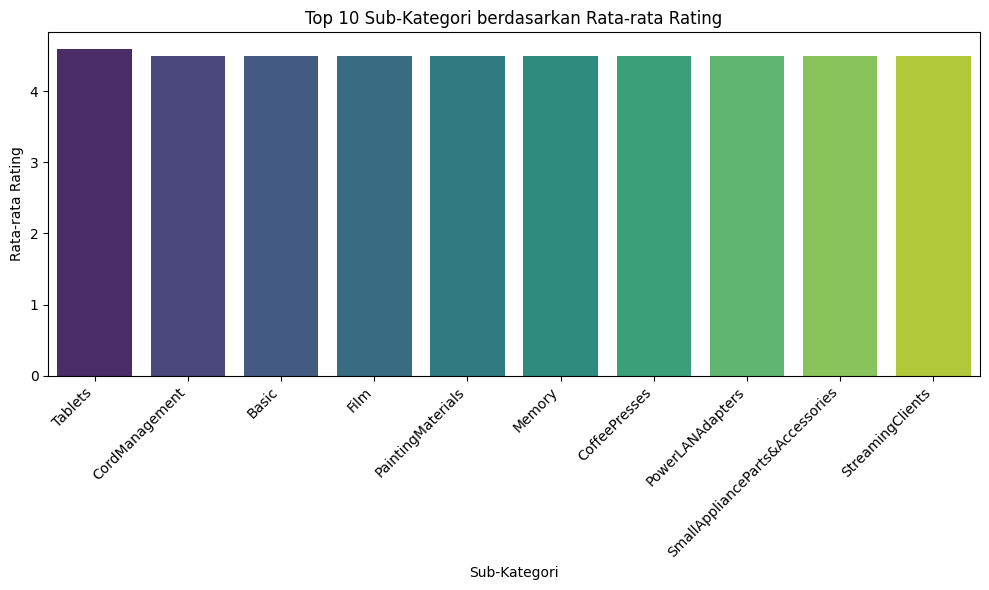

In [20]:
# Menghitung rata-rata rating untuk setiap sub-kategori dan memilih 10 teratas
print("="*50 + " Top 10 Sub Categories by Average Rating " + "="*50)

# Mengelompokkan data berdasarkan 'sub_category', menghitung rata-rata 'rating', mengurutkan, dan mengambil 10 teratas
top_sub_categories_by_rating = amazon.groupby('sub_category')['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Menampilkan tabel 10 sub-kategori teratas berdasarkan rata-rata rating
print('10 Sub-Kategori Teratas berdasarkan Rata-rata Rating:')
display(top_sub_categories_by_rating)

# Visualisasi: Top 10 Sub-Kategori berdasarkan Rata-rata Rating
plt.figure(figsize=(10, 6))
# Membuat bar plot dari 10 sub-kategori teratas berdasarkan rata-rata rating
sns.barplot(x='sub_category', y='rating', data=top_sub_categories_by_rating, palette='viridis')
plt.xlabel('Sub-Kategori') # Mengubah label x
plt.ylabel('Rata-rata Rating') # Mengubah label y
plt.title('Top 10 Sub-Kategori berdasarkan Rata-rata Rating')
plt.xticks(rotation=45, ha='right') # Memutar label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Output di atas menampilkan 10 sub-kategori produk dengan **rata-rata rating tertinggi** dari seluruh dataset.
* **Tabel "10 Sub-Kategori Teratas berdasarkan Rata-rata Rating":**
   * Sub-kategori **Tablets** menempati posisi teratas dengan **rata-rata rating 4.6**, menunjukkan bahwa produk dalam sub-kategori ini sangat memuaskan bagi pengguna.
   * Disusul oleh beberapa sub-kategori lainnya dengan rating **4.5**, seperti:
      * **Film**, **Memory**, **Streaming Clients**
      * Serta aksesori atau perlengkapan rumah tangga seperti **Cord Management**, **Surge Protectors**, dan **Coffee Presses**.

Mayoritas sub-kategori dalam daftar ini memiliki **jumlah produk yang lebih sedikit**, sehingga nilai rating bisa lebih tinggi jika produk-produk tersebut memang unggul. Beberapa sub-kategori seperti **PowerLAN Adapters** dan **Painting Materials** juga menarik karena mereka termasuk dalam segmen yang cukup spesifik namun tetap mendapat rating sangat tinggi.

Sub-kategori dengan produk-produk berkualitas tinggi dan cenderung memperoleh rating lebih baik. Rating ini bisa menjadi indikator penting bagi pengguna saat ingin membeli produk dari sub-kategori tertentu.


In [21]:
# Mengubah kolom 'rating_weighted' menjadi tipe data float, jika belum
# Menggunakan .astype(float) untuk konversi
# Menambahkan errors='coerce' untuk mengubah nilai yang tidak bisa diubah menjadi NaN
# Kemudian menghapus baris dengan NaN jika ada
amazon['rating_weighted'] = pd.to_numeric(amazon['rating_weighted'], errors='coerce')
amazon.dropna(subset=['rating_weighted'], inplace=True)


import pandas as pd

# Mengelompokkan DataFrame 'amazon' berdasarkan kolom 'category'
# Kemudian, untuk setiap grup (setiap kategori), ambil 10 baris teratas
# berdasarkan nilai di kolom 'rating_weighted' (nilai tertinggi)
top_reviewed_per_category = (
    amazon.groupby(["category"])
    .apply(lambda x: x.nlargest(10, "rating_weighted"))
    .reset_index(drop=True) # Mengatur ulang index setelah operasi apply
)

# Menampilkan 10 baris pertama dari hasil (produk dengan rating_weighted tertinggi di awal)
# Memilih kolom-kolom yang relevan dan mengurutkannya berdasarkan 'rating_weighted' secara menurun
display(top_reviewed_per_category[['main_category','sub_category', 'rating', 'rating_count', 'rating_weighted']].head(10).sort_values(by=['rating_weighted'], ascending=False).reset_index(drop=True))

<ipython-input-21-d5617417ff88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating_weighted'] = pd.to_numeric(amazon['rating_weighted'], errors='coerce')
<ipython-input-21-d5617417ff88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.dropna(subset=['rating_weighted'], inplace=True)
<ipython-input-21-d5617417ff88>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=Fal

,main_category,sub_category,rating,rating_count,rating_weighted
0,Computers&Accessories,Webcams,4.3,20398.0,87711.4
1,Computers&Accessories,PCMicrophones,3.9,14969.0,58379.1
2,Computers&Accessories,Webcams,4.1,10976.0,45001.6
3,Computers&Accessories,PCSpeakers,4.0,7352.0,29408.0
4,Computers&Accessories,PCHeadsets,3.5,7222.0,25277.0
5,Computers&Accessories,PCSpeakers,4.1,5195.0,21299.5
6,Computers&Accessories,USBtoUSBAdapters,4.3,4426.0,19031.8
7,Computers&Accessories,PCMicrophones,3.3,2804.0,9253.2
8,Computers&Accessories,USBtoUSBAdapters,4.0,1540.0,6160.0
9,Car&Motorbike,AirPurifiers&Ionizers,3.8,1118.0,4248.4


Output di atas menampilkan produk-produk dengan **nilai rating tertimbang (_rating_weighted_) tertinggi** untuk masing-masing kategori.
* **Apa itu `rating_weighted`?**
   * Ini adalah skor yang dihitung dengan mengalikan rating dan jumlah rating (rating × rating_count).
   * Tujuannya untuk memberi bobot lebih pada produk yang tidak hanya memiliki rating tinggi, tetapi juga banyak ulasan.
* **Contoh dari Hasil Output:**
   * Produk pada kategori **Computers&Accessories** mendominasi, menunjukkan bahwa banyak produk di kategori ini memiliki ulasan dalam jumlah besar dengan rating tinggi.
   * Contoh: Sub-kategori **Webcams** dengan rating 4.3 dan lebih dari 20.000 ulasan menghasilkan _rating_weighted_ sebesar **87.711,4**, tertinggi di daftar ini.
   * Diikuti oleh **PC Microphones** dan **PC Speakers**, menunjukkan bahwa perangkat keras komputer banyak diminati dengan ulasan tinggi.
* **Produk dari Kategori Lain:**
   * Ada juga kategori seperti **Car&Motorbike** yang muncul di peringkat ke-10, dengan sub-kategori **AirPurifiers&Ionizers**, menandakan bahwa meski tidak dominan jumlahnya, tetap ada produk yang unggul di kategori ini.

Data ini membantu mengidentifikasi **produk paling populer dan terpercaya** di tiap kategori. Sangat berguna untuk analisis rekomendasi produk atau untuk menyoroti produk unggulan dalam tiap kategori.


================================================== Average Discount Percentage by Main Category ==================================================
Rata-rata Persentase Diskon per Kategori Utama:


,discount_percentage
main_category,
HomeImprovement,0.575000
Computers&Accessories,0.539202
Health&PersonalCare,0.530000
Electronics,0.508289
MusicalInstruments,0.460000
Car&Motorbike,0.420000
Home&Kitchen,0.401745
OfficeProducts,0.123548
Toys&Games,0.000000


<ipython-input-22-713931057030>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=average_discount_by_main_category.index, x=average_discount_by_main_category.values, palette='viridis')


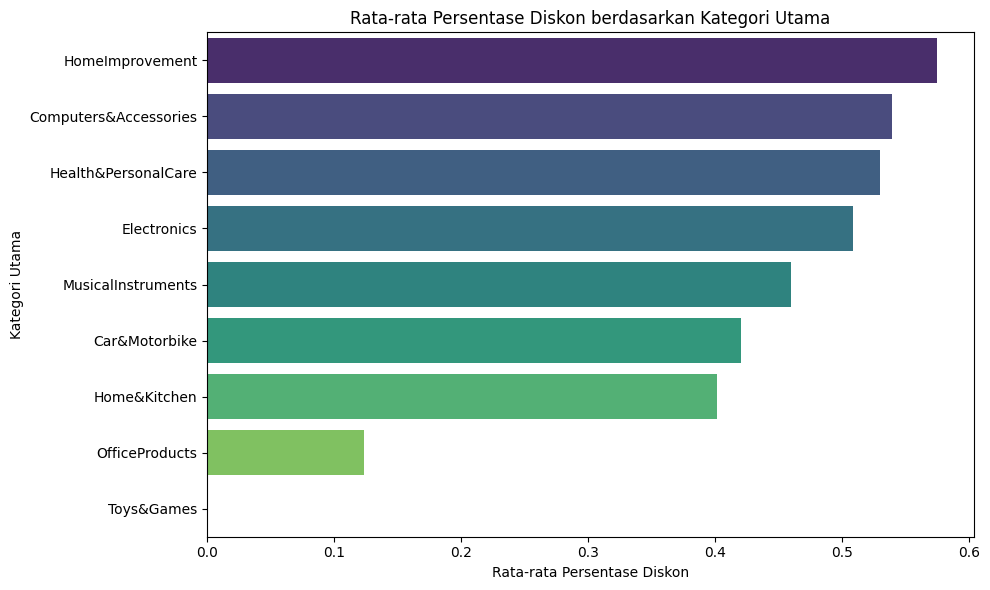

In [22]:
# Analisis rata-rata persentase diskon berdasarkan kategori utama
print("="*50 + " Average Discount Percentage by Main Category " + "="*50)

# Mengelompokkan data berdasarkan 'main_category' dan menghitung rata-rata 'discount_percentage'
average_discount_by_main_category = amazon.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False) # Mengurutkan dari diskon terbesar

# Menampilkan rata-rata persentase diskon per kategori utama
print("Rata-rata Persentase Diskon per Kategori Utama:")
display(average_discount_by_main_category)

# Visualisasi: Rata-rata Persentase Diskon per Kategori Utama
plt.figure(figsize=(10, 6))
# Membuat bar plot horizontal
sns.barplot(y=average_discount_by_main_category.index, x=average_discount_by_main_category.values, palette='viridis')
plt.title('Rata-rata Persentase Diskon berdasarkan Kategori Utama')
plt.xlabel('Rata-rata Persentase Diskon')
plt.ylabel('Kategori Utama')
plt.tight_layout()
plt.show()

Output di atas menampilkan **rata-rata persentase diskon** untuk setiap kategori utama (main_category) pada dataset.
* **Apa yang ditunjukkan oleh nilai `discount_percentage` ini?**
   * Nilai ini menunjukkan seberapa besar rata-rata diskon (dalam persentase) yang diberikan pada produk dalam tiap kategori utama
   * Semakin tinggi angkanya, semakin besar rata-rata diskon yang diberikan pada produk di kategori tersebut.

* **Temuan Utama dari Output:**
   * Kategori dengan rata-rata diskon tertinggi adalah:
      * **HomeImprovement (57,5%)**
      * **Computers&Accessories (53,9%)**
      * **Health&PersonalCare (53%)**
      * **Electronics (50,8%)**
   * Ini menunjukkan bahwa produk-produk dari kategori tersebut sering diberikan potongan harga yang besar, mungkin karena kompetisi tinggi atau strategi pemasaran.

* **Kategori dengan Diskon Terendah:**
   * **Toys&Games** memiliki rata-rata diskon **0%**, yang bisa berarti:
      * Produk dalam kategori ini tidak sedang didiskon saat data dikumpulkan, atau
      * Jumlah produk di kategori ini sangat sedikit sehingga tidak mencerminkan diskon secara umum.

Informasi ini penting untuk analisis harga dan strategi promosi. Konsumen dapat menggunakan data ini untuk mengetahui kategori mana yang paling sering mendapat potongan harga besar. Untuk bisnis, data ini bisa digunakan untuk membandingkan efektivitas diskon antar kategori produk.



================================================== Average Discount Percentage by Sub Category ==================================================
Rata-rata Persentase Diskon per Sub-Kategori (Top 15):


,discount_percentage
sub_category,
CableConnectionProtectors,0.900000
Earpads,0.900000
PhoneCharms,0.900000
DustCovers,0.875000
Shower&WallMounts,0.820000
Adapters,0.803333
InternalHardDrives,0.800000
USBtoUSBAdapters,0.785000
Stands,0.758182


<ipython-input-23-8999cf1bc811>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=average_discount_by_sub_category.index, x=average_discount_by_sub_category.values, palette='viridis')


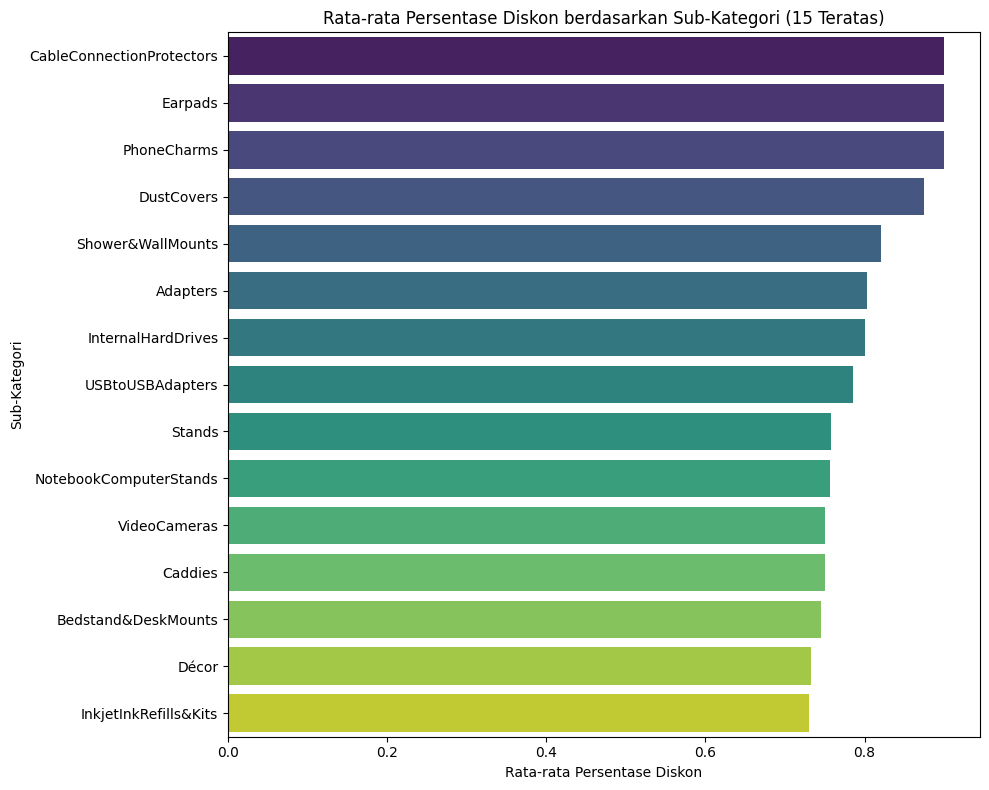

In [23]:
# Analisis rata-rata persentase diskon berdasarkan sub-kategori
print("="*50 + " Average Discount Percentage by Sub Category " + "="*50)

# Mengelompokkan data berdasarkan 'sub_category' dan menghitung rata-rata 'discount_percentage'
# Mengurutkan dari diskon terbesar dan mengambil 15 teratas
average_discount_by_sub_category = amazon.groupby('sub_category')['discount_percentage'].mean().sort_values(ascending=False).head(15)

# Menampilkan rata-rata persentase diskon per sub-kategori
print("Rata-rata Persentase Diskon per Sub-Kategori (Top 15):")
display(average_discount_by_sub_category)

# Visualisasi: Rata-rata Persentase Diskon per Sub-Kategori
plt.figure(figsize=(10, 8))
# Membuat bar plot horizontal
sns.barplot(y=average_discount_by_sub_category.index, x=average_discount_by_sub_category.values, palette='viridis')
plt.title('Rata-rata Persentase Diskon berdasarkan Sub-Kategori (15 Teratas)')
plt.xlabel('Rata-rata Persentase Diskon')
plt.ylabel('Sub-Kategori')
plt.tight_layout()
plt.show()

Output ini menunjukkan **15 sub-kategori teratas** berdasarkan nilai rata-rata persentase diskon (`discount_percentage`) tertinggi.
* **Apa yang dimaksud dengan discount_percentage di sini?**
   * Ini adalah nilai rata-rata dari potongan harga (dalam persentase) untuk setiap sub-kategori produk.
   * Nilai 0.90 artinya rata-rata diskon sebesar 90%.

* **Temuan Utama:**
   * Tiga sub-kategori teratas — **CableConnectionProtectors**, **Earpads**, dan **PhoneCharms** — masing-masing memiliki rata-rata diskon sebesar **90%**.
      * Ini menunjukkan bahwa produk dalam sub-kategori tersebut hampir selalu dijual dengan potongan harga yang sangat besar.
   * Beberapa sub-kategori lainnya seperti **DustCovers**, **Shower&WallMounts**, dan **Adapters** juga memiliki diskon tinggi (di atas 80%).

* **Apa artinya ini secara praktis?**
   * Konsumen bisa memanfaatkan info ini untuk mencari produk dengan diskon tinggi.
   *  Bisnis dapat menganalisis sub-kategori mana yang sering diberi diskon besar, mungkin sebagai strategi untuk mengurangi stok atau karena permintaan rendah.

Diskon terbesar banyak ditemukan di produk-produk aksesori kecil dan pendukung, bukan produk utama. Ini bisa mencerminkan strategi marketing atau kecenderungan pasar dalam memberi diskon pada produk-produk pelengkap.


In [24]:
# Menampilkan statistik deskriptif untuk kolom-kolom numerik
print("="*50 + " Descriptive Statistics for Numerical Columns " + "="*50)

# Memilih kolom-kolom numerik
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'rating_weighted']

# Menampilkan statistik deskriptif untuk kolom-kolom numerik
display(amazon[numerical_cols].describe())

================================================== Descriptive Statistics for Numerical Columns ==================================================


,discounted_price,actual_price,discount_percentage,rating,rating_count,rating_weighted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,3129.981826,5453.087743,0.476724,4.096717,18307.376881,7.626501e+04
std,6950.548042,10884.467444,0.216139,0.289497,42766.096572,1.802087e+05
min,39.000000,39.000000,0.000000,2.000000,2.000000,4.000000e+00
25%,325.000000,800.000000,0.320000,4.000000,1191.500000,4.766200e+03
50%,799.000000,1670.000000,0.500000,4.100000,5179.000000,2.158740e+04
75%,1999.000000,4321.250000,0.630000,4.300000,17342.250000,7.186185e+04
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000,1.878681e+06


Berikut penjelasan dari output **"Descriptive Statistics for Numerical Columns"** berdasarkan hasilnya:

---

### 📊 **Statistik Deskriptif untuk Kolom Numerik**

Output ini memberikan **rangkuman statistik** dari 4 kolom numerik: `discounted_price`, `actual_price`, `discount_percentage`, dan `rating_weighted`, berdasarkan 1462 data produk.

#### 🔸 **discounted\_price (Harga Setelah Diskon)**

* **Rata-rata (mean):** Rp3.129
* **Minimum - Maksimum:** Rp39 – Rp77.990
* **Median (50%):** Rp799
* **Interpretasi:**

  * Ada produk dengan harga sangat rendah (Rp39), tapi juga ada yang sangat mahal (hingga Rp77.990).
  * Nilai rata-rata yang cukup tinggi (Rp3.129) mengindikasikan adanya beberapa produk mahal yang menarik rata-rata ke atas.

#### 🔸 **actual\_price (Harga Sebelum Diskon)**

* **Rata-rata:** Rp5.453
* **Minimum - Maksimum:** Rp39 – Rp139.900
* **Median:** Rp1.670
* **Interpretasi:**

  * Produk-produk dengan harga sangat tinggi secara signifikan memengaruhi rata-rata.
  * Ada perbedaan besar antara median dan rata-rata, yang menunjukkan data cukup *skewed* (condong) ke kanan (harga-harga ekstrem tinggi).

#### 🔸 **discount\_percentage (Persentase Diskon)**

* **Rata-rata:** 47.67%
* **Minimum - Maksimum:** 0% – 94%
* **Median:** 50%
* **Interpretasi:**

  * Sebagian besar produk memiliki potongan harga cukup besar, bahkan hingga 94%.
  * Median 50% artinya separuh produk memiliki diskon ≥ 50%.

#### 🔸 **rating\_weighted (Rating x Jumlah Rating)**

* **Rata-rata:** 76.265
* **Minimum - Maksimum:** 4 – 1.878.681
* **Median:** 21.587
* **Interpretasi:**

  * Nilai ini menunjukkan pengaruh total (gabungan kualitas dan popularitas).
  * Adanya produk dengan `rating_weighted` sangat tinggi (di atas 1 juta) membuat standar deviasi juga besar, menandakan **data sangat tersebar**.



# Data Preparation

Pada tahap ini, data disiapkan agar bisa digunakan dalam proses machine learning atau analisis lanjutan. Langkah-langkah yang dilakukan meliputi: seleksi fitur, penggabungan teks, dan vektorisasi teks.



---



## Seleksi Fitur

Proses ini bertujuan untuk menyederhanakan dataset dengan hanya mengambil kolom-kolom yang relevan. Kolom-kolom yang tidak dibutuhkan seperti harga, link gambar, dan identitas user dihapus agar fokus pada informasi penting yang mendukung analisis.



---



In [25]:
product_data = amazon.drop(['discounted_price', 'actual_price', 'discount_percentage', 'review_id', 'review_title',
                   'user_name', 'img_link', 'product_link'], axis=1)

product_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1462 non-null   object 
 1   product_name     1462 non-null   object 
 2   category         1462 non-null   object 
 3   rating           1462 non-null   float64
 4   rating_count     1462 non-null   float64
 5   about_product    1462 non-null   object 
 6   user_id          1462 non-null   object 
 7   review_content   1462 non-null   object 
 8   rating_weighted  1462 non-null   float64
 9   sub_category     1462 non-null   object 
 10  main_category    1462 non-null   object 
dtypes: float64(3), object(8)
memory usage: 137.1+ KB


In [26]:
product_data['combined_text'] = product_data['product_name'] + ' ' + product_data['category'] + ' ' + product_data['about_product'] +' '+ product_data['review_content']
# Mengisi nilai null dengan string kosong untuk menghindari masalah
product_data['combined_text'] = product_data['combined_text'].fillna('')

Kode di atas membuat kolom baru bernama `combined_text` dengan menggabungkan teks dari kolom `product_name`, `category`, `about_product`, dan `review_content`. Penggabungan ini dilakukan dengan menambahkan spasi di antara setiap kolom.

Kemudian, kode menggunakan `.fillna('')` pada kolom `combined_text`. Langkah ini penting untuk mengganti potensi nilai-nilai yang hilang (NaN) dalam kolom gabungan dengan string kosong (''). Ini dilakukan untuk mencegah error saat pemrosesan teks lebih lanjut yang mungkin tidak bisa menangani nilai null.

# Feature Engineering: TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik untuk mengubah data teks menjadi representasi numerik. Tujuannya adalah agar algoritma machine learning bisa “membaca” dan memahami teks.


---



## Instantiate TF-IDF Vectorizer

In [27]:
print("="*50 + " TF-IDF Feature Engineering " + "="*50)

# Gabungkan fitur teks yang relevan
# Menggunakan product_name, category, about_product, dan review_content
product_data['all_text_features'] = (
    product_data['product_name'].fillna('') + " " +
    product_data['category'].fillna('') + " " +
    product_data['about_product'].fillna('') + " " +
    product_data['review_content'].fillna('')
)

# Inisialisasi TF-IDF Vectorizer
# Menggunakan parameter stop_words untuk menghapus kata-kata umum dalam bahasa Inggris
# max_features untuk membatasi jumlah fitur (kata) yang dipertimbangkan
# min_df untuk mengabaikan kata-kata yang muncul kurang dari jumlah dokumen tertentu
# max_df untuk mengabaikan kata-kata yang muncul di lebih dari persentase dokumen tertentu
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, min_df=2, max_df=0.8)

# Fit dan transform data
tfidf_matrix_features = tfidf_vectorizer.fit_transform(product_data['all_text_features'])

print(f"Bentuk matriks TF-IDF: {tfidf_matrix_features.shape}")
print("\nContoh nama fitur (kata):")
print(tfidf_vectorizer.get_feature_names_out()[:20])

================================================== TF-IDF Feature Engineering ==================================================
Bentuk matriks TF-IDF: (1462, 5000)

Contoh nama fitur (kata):
['00' '000' '01' '02' '03' '04' '05' '07' '09' '0a' '0ghz' '10' '100'
 '1000' '10000' '10000mah' '1000w' '100mbps' '100ml' '102']


Output di atas menampilkan hasil dari proses TF-IDF Feature Engineering:
  
*   **`Bentuk matriks TF-IDF: (1462, 5000)`**: Ini adalah informasi utama yang dihasilkan oleh `tfidf_matrix_features.shape`.
    *   Angka pertama, 1462, menunjukkan jumlah dokumen (dalam hal ini, jumlah baris data setelah pembersihan) yang diwakili dalam matriks.
    *   Angka kedua, 5000, menunjukkan jumlah fitur (kata atau term unik) yang dipertimbangkan oleh TF-IDF Vectorizer. Telah dibatasi jumlah fitur maksimum hingga 5000 dengan parameter `max_features=5000`.
    Matriks ini adalah representasi numerik dari konten teks, di mana setiap baris mewakili dokumen (produk), setiap kolom mewakili kata unik (fitur), dan nilai di setiap sel menunjukkan skor TF-IDF kata tersebut dalam dokumen tersebut.
*   **`Contoh nama fitur (kata): ['00' '000' '01' ...]`**: Ini adalah beberapa contoh fitur (kata) pertama yang diekstraksi oleh TF-IDF Vectorizer setelah membersihkan *stopwords* dan menerapkan batasan `min_df` serta `max_df`. Fitur-fitur ini akan digunakan dalam analisis atau model yang menggunakan representasi teks.

In [28]:
tfidf_matrix_features.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.08287684, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Output di atas menampilkan representasi *dense* dari matriks TF-IDF:

*   Matriks ini adalah versi yang lebih padat dari matriks TF-IDF yang sebelumnya (`(1462, 5000)`).
*   Setiap baris dalam matriks ini merepresentasikan satu dokumen (produk).
*   Setiap kolom merepresentasikan satu fitur (kata unik) yang diekstraksi oleh TF-IDF Vectorizer.
*   Nilai di setiap sel matriks menunjukkan skor TF-IDF dari kata tertentu (kolom) dalam dokumen tertentu (baris). Nilai ini mengukur seberapa penting kata tersebut dalam dokumen relatif terhadap seluruh seluruh dataset produk.
*   Matriks ini didominasi oleh nilai nol (karena sebagian besar kata hanya muncul di sebagian kecil dokumen), itulah sebabnya representasi *sparse* (seperti yang dihasilkan langsung oleh `TfidfVectorizer`) lebih efisien memori. Namun, mengonversinya ke *dense* memungkinkan melihat nilai-nilai numerik secara langsung.

Output ini adalah representasi numerik dari konten teks produk yang siap digunakan sebagai fitur untuk model machine learning atau perhitungan kemiripan.

# Model Content-Based Filtering


## Preparasi Data Produk


In [29]:
print("="*50 + " Preparing Product Data " + "="*50)
# Mengambil data produk unik dengan kolom yang relevan
product_data = amazon[['product_id', 'product_name', 'category', 'about_product', 'sub_category']].drop_duplicates()
product_data = product_data.reset_index(drop=True)  # Reset index untuk memastikan konsistensi
print(f"Prepared {len(product_data)} unique products for recommendation")
display(product_data.head(2))  # Menampilkan sample data

================================================== Preparing Product Data ==================================================
Prepared 1352 unique products for recommendation


,product_id,product_name,category,about_product,sub_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...",USBCables


Output di atas menunjukkan hasil dari langkah "Preparasi Data Produk" untuk model *Content-Based Filtering*.

* **`Prepared 1352 unique products for recommendation`**: Baris ini menginformasikan bahwa setelah menghapus duplikasi, terdapat 1352 produk unik yang akan digunakan untuk proses rekomendasi. Ini penting karena model rekomendasi biasanya bekerja dengan data produk yang unik.
* **Tabel Data Produk**: Tabel yang ditampilkan adalah cuplikan (beberapa baris pertama) dari DataFrame `product_data` yang telah disiapkan. Kolom-kolom yang disertakan adalah:
    * `product_id`: ID unik dari produk.
    * `product_name`: Nama produk.
    * `category`: Kategori lengkap produk.
    * `about_product`: Deskripsi singkat tentang produk.
    * `sub_category`: Sub-kategori produk (yang sebelumnya diekstrak).

DataFrame `product_data` ini kini berisi informasi kunci untuk setiap produk unik yang akan digunakan sebagai dasar dalam menghitung kemiripan konten antar produk. Index dari DataFrame ini juga telah direset untuk memastikan urutan yang konsisten.

## TF-IDF Vectorization

In [30]:
print("\n" + "="*50 + " TF-IDF Vectorization " + "="*50)

# Menggabungkan fitur teks untuk analisis TF-IDF
product_data['combined_features'] = (
    product_data['product_name'] + " " +
    product_data['category'] + " " +
    product_data['sub_category'] + " " +
    product_data['about_product']
)

# Membuat TF-IDF Vectorizer dengan parameter optimal
tfidf = TfidfVectorizer(
    stop_words='english',  # Menghilangkan kata umum (stopwords)
    max_features=5000,     # Membatasi jumlah fitur maksimum
    min_df=2,             # Term harus muncul minimal di 2 dokumen
    max_df=0.8            # Term tidak boleh muncul di >80% dokumen
)
tfidf_matrix = tfidf.fit_transform(product_data['combined_features'])

print(f"\nTF-IDF Matrix Shape: {tfidf_matrix.shape}")
print("Sample feature names:", tfidf.get_feature_names_out()[:10])


================================================== TF-IDF Vectorization ==================================================

TF-IDF Matrix Shape: (1352, 5000)
Sample feature names: ['00' '000' '003' '01' '01259e' '022' '04' '05' '07' '080']


Output di atas menampilkan hasil dari proses TF-IDF Vectorization:

* **`TF-IDF Matrix Shape: (1352, 5000)`**: Ini adalah informasi utama yang dihasilkan oleh `tfidf_matrix.shape`.
    * Angka pertama, 1352, menunjukkan jumlah dokumen (dalam hal ini, jumlah produk unik) yang diwakili dalam matriks. Ini sesuai dengan jumlah produk unik sebelumnya.
    * Angka kedua, 5000, menunjukkan jumlah fitur (kata atau term unik) yang dipertimbangkan oleh TF-IDF Vectorizer. Telah dibatasi jumlah fitur maksimum hingga 5000 dengan parameter `max_features=5000`.
    Matriks ini adalah representasi numerik dari konten teks produk, di mana setiap baris mewakili produk, setiap kolom mewakili kata unik (fitur), dan nilai di setiap sel menunjukkan skor TF-IDF kata tersebut dalam dokumen (produk) tersebut.
* **`Sample feature names: ['00' '000' '003' '01' '01259e' '022' '04' '05' '07' '080']`**: Ini adalah beberapa contoh fitur (kata) pertama yang diekstraksi oleh TF-IDF Vectorizer setelah membersihkan *stopwords* dan menerapkan batasan `min_df` serta `max_df`. Kata-kata ini adalah fitur yang akan digunakan untuk menghitung kemiripan antar produk dalam model Content-Based Filtering.

## Cosine Similarity Calculation

In [31]:
print("\n" + "="*50 + " Calculating Similarity " + "="*50)

# Menghitung cosine similarity antara semua produk
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat DataFrame untuk kemudahan interpretasi
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=product_data['product_name'],  # Nama produk sebagai index
    columns=product_data['product_name']  # Nama produk sebagai kolom
)

print(f"Similarity Matrix Shape: {cosine_sim_df.shape}")
print("\nSample similarity scores:")
display(cosine_sim_df.iloc[:5, :5])  # Menampilkan sample similarity matrix


================================================== Calculating Similarity ==================================================
Similarity Matrix Shape: (1352, 1352)

Sample similarity scores:


product_name,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)","Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)","Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices","boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)","Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)"
product_name,,,,,
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",1.000000,0.168193,0.337127,0.148630,0.433358
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",0.168193,1.000000,0.188844,0.274691,0.253298
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",0.337127,0.188844,1.000000,0.147163,0.288873
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",0.148630,0.274691,0.147163,1.000000,0.174589
"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)",0.433358,0.253298,0.288873,0.174589,1.000000


Output di atas menampilkan hasil dari proses perhitungan Cosine Similarity:

* **`Similarity Matrix Shape: (1352, 1352)`**: Ini adalah informasi utama dari output.
    * Angka pertama, 1352, menunjukkan jumlah baris dalam matriks.
    * Angka kedua, 1352, menunjukkan jumlah kolom dalam matriks.

Matriks ini adalah matriks persegi (square matrix) karena setiap baris dan kolom merepresentasikan salah satu produk dalam dataset (yang berjumlah 1352 setelah pembersihan data).

Setiap sel dalam matriks ini pada posisi (i, j) berisi nilai Cosine Similarity antara produk ke-i dan produk ke-j. Nilai Cosine Similarity berkisar antara 0 hingga 1:

* Nilai **1** berarti kedua produk sangat mirip dalam hal konten teks (nama, kategori, deskripsi, ulasan).
* Nilai **0** berarti kedua produk tidak memiliki kemiripan sama sekali dalam hal konten teks.
* Nilai di antara 0 dan 1 menunjukkan tingkat kemiripan parsial.

Matriks Cosine Similarity inilah yang menjadi inti dari model rekomendasi berbasis konten. Matriks ini menyimpan informasi tentang seberapa mirip setiap produk dengan setiap produk lainnya berdasarkan fitur teks yang telah diolah menggunakan TF-IDF. Nantinya, matriks ini akan digunakan oleh fungsi rekomendasi untuk mencari produk-produk yang paling mirip dengan produk yang sedang dilihat oleh pengguna.

## Rekomendasi Berdasarkan Nama Produk

In [32]:
print("\n" + "="*50 + " Recommendation Function (by Product Name) " + "="*50)

def product_recommendations(product_name, similarity_data=cosine_sim_df, product_info=product_data, k=5):
    """
    Memberikan rekomendasi produk berdasarkan nama produk

    Parameters:
    - product_name: Nama produk yang ingin dicari rekomendasinya
    - similarity_data: DataFrame similarity antar produk
    - product_info: DataFrame informasi produk
    - k: Jumlah rekomendasi yang diinginkan

    Returns:
    - DataFrame berisi produk rekomendasi dengan similarity score
    - Pesan error jika produk tidak ditemukan
    """
    try:
        # Mengambil produk dengan similarity tertinggi
        similar_products = similarity_data[product_name].sort_values(ascending=False)[1:k+1]

        # Mengambil informasi produk yang direkomendasikan
        recommendations = product_info[product_info['product_name'].isin(similar_products.index)]
        recommendations = recommendations.copy()
        recommendations['similarity_score'] = similar_products.values

        return recommendations.sort_values('similarity_score', ascending=False)
    except KeyError:
        return f"Produk '{product_name}' tidak ditemukan di database."

print("Recommendation function ready to use!")


================================================== Recommendation Function (by Product Name) ==================================================
Recommendation function ready to use!


## Rekomendasi Berdasarkan Product ID

In [33]:
print("\n" + "="*50 + " Recommendation Function (by Product ID) " + "="*50)

def cbf_product_recommendations(id_product, similarity_data=cosine_sim, items=product_data, top_n=10):
    """
    Memberikan rekomendasi produk berdasarkan ID produk

    Parameters:
    - id_product: ID produk yang ingin dicari rekomendasinya
    - similarity_data: Matrix similarity antar produk
    - items: DataFrame informasi produk
    - top_n: Jumlah rekomendasi yang diinginkan

    Returns:
    - List indeks produk yang direkomendasikan
    """
    # Mencari index produk berdasarkan product_id
    index = items.index[items.product_id == id_product][0]

    # Mengambil dan mengurutkan similarity scores
    sim_scores = list(enumerate(similarity_data[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengembalikan indeks top_n rekomendasi
    return [i[0] for i in sim_scores[1:top_n+1]]

print("Recommendation function by product ID ready to use!")


================================================== Recommendation Function (by Product ID) ==================================================
Recommendation function by product ID ready to use!


## Testing Rekomendasi

In [34]:
print("\n" + "="*50 + " Testing Recommendations " + "="*50)

# Rekomendasi berdasarkan nama produk
print("\nTest 1: Rekomendasi berdasarkan nama produk")
sample_product = product_data[product_data['category'].str.contains('Electronics', case=False, na=False)]['product_name'].iloc[0]
print(f"\nRecommendations for: {sample_product}")
display(product_recommendations(sample_product))

# Rekomendasi berdasarkan product ID
print("\nTest 2: Rekomendasi berdasarkan product ID")
sample_product_id = product_data['product_id'][0]
print(f"\nSample product ID: {sample_product_id}")

# Menampilkan detail produk referensi
print("\nReference product details:")
display(product_data.loc[product_data.product_id.eq(sample_product_id),
                       ['product_id', 'product_name', 'category', 'sub_category']])

# Menampilkan rekomendasi
print("\nRecommended products:")
display(product_data.iloc[cbf_product_recommendations(sample_product_id)])


================================================== Testing Recommendations ==================================================

Test 1: Rekomendasi berdasarkan nama produk

Recommendations for: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot


,product_id,product_name,category,about_product,sub_category,combined_features,similarity_score
25,B01M4GGIVU,Tizum High Speed HDMI Cable with Ethernet | Su...,"Electronics|HomeTheater,TV&Video|Accessories|C...",Latest Standard HDMI A Male to A Male Cable: S...,HDMICables,Tizum High Speed HDMI Cable with Ethernet | Su...,0.617830
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",Please select appropriate display resolution &...,HDMICables,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",0.608048
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",HDMI A Male to A Male Cable: Supports Ethernet...,HDMICables,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",0.590813
204,B00GG59HU2,BlueRigger High Speed HDMI Cable with Ethernet...,"Electronics|HomeTheater,TV&Video|Accessories|C...",[Premium Cable] - High-Speed HDMI Cables. Made...,HDMICables,BlueRigger High Speed HDMI Cable with Ethernet...,0.577854
267,B075ZTJ9XR,AmazonBasics High-Speed Braided HDMI Cable - 3...,"Electronics|HomeTheater,TV&Video|Accessories|C...",Nylon-braided HDMI cable (A Male to A Male): s...,HDMICables,AmazonBasics High-Speed Braided HDMI Cable - 3...,0.571482



Test 2: Rekomendasi berdasarkan product ID

Sample product ID: B07JW9H4J1

Reference product details:


,product_id,product_name,category,sub_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,USBCables



Recommended products:


,product_id,product_name,category,about_product,sub_category,combined_features
220,B07JH1CBGW,Wayona Nylon Braided Usb Syncing And Charging ...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : iPhone X/XsMax/Xr ,iPho...",USBCables,Wayona Nylon Braided Usb Syncing And Charging ...
42,B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : iPhone X/XsMax/Xr ,iPho...",USBCables,Wayona Nylon Braided 3A Lightning to USB A Syn...
89,B07JH1C41D,Wayona Nylon Braided (2 Pack) Lightning Fast U...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : iPhone X/XsMax/Xr ,iPho...",USBCables,Wayona Nylon Braided (2 Pack) Lightning Fast U...
80,B07LGT55SJ,Wayona Usb Nylon Braided Data Sync And Chargin...,Computers&Accessories|Accessories&Peripherals|...,[High Compatibility] : Compatible For iPhone X...,USBCables,Wayona Usb Nylon Braided Data Sync And Chargin...
166,B07JPJJZ2H,Wayona Nylon Braided Lightning USB Data Sync &...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : iPhones, iPad Air, iPad...",USBCables,Wayona Nylon Braided Lightning USB Data Sync &...
106,B07JGDB5M1,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : Phone X/XsMax/Xr ,Phone...",USBCables,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...
208,B095244Q22,MYVN LTG to USB for Fast Charging & Data Sync ...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : iPhones, iPad Air, iPad...",USBCables,MYVN LTG to USB for Fast Charging & Data Sync ...
104,B07JNVF678,Wayona Nylon Braided USB Data Sync and Fast Ch...,Computers&Accessories|Accessories&Peripherals|...,"[High Compatibility] : iPhones, iPad Air, iPad...",USBCables,Wayona Nylon Braided USB Data Sync and Fast Ch...
78,B0B2DJDCPX,SWAPKART Fast Charging Cable and Data Sync USB...,Computers&Accessories|Accessories&Peripherals|...,[High Compatibility] : This iphone data cable ...,USBCables,SWAPKART Fast Charging Cable and Data Sync USB...
186,B0B8SSC5D9,AmazonBasics USB C to Lightning Aluminum with ...,Computers&Accessories|Accessories&Peripherals|...,Nylon-braided charging cable with a USB-C powe...,USBCables,AmazonBasics USB C to Lightning Aluminum with ...


# Model Collaborative Filtering

## Preparasi Data Rating

In [35]:
print("="*50 + " Preparing Rating Data " + "="*50)

# Mengambil data rating dari dataset yang sudah dibersihkan
rating_data = amazon[['user_id', 'product_id', 'rating']].copy()

# Menampilkan informasi dasar
print(f"Total ratings: {len(rating_data)}")
print(f"Unique users: {rating_data['user_id'].nunique()}")
print(f"Unique products: {rating_data['product_id'].nunique()}")
display(rating_data.head())

================================================== Preparing Rating Data ==================================================
Total ratings: 1462
Unique users: 1191
Unique products: 1348


,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


Output di atas menampilkan hasil dari langkah "Preparasi Data Rating" untuk model *Collaborative Filtering*:

*   **`Total ratings: 1462`**: Ini menunjukkan jumlah total baris (interaksi rating) yang ada dalam dataset rating setelah pembersihan.
*   **`Unique users: 1191`**: Ini adalah jumlah pengguna unik yang memberikan rating pada produk.
*   **`Unique products: 1348`**: Ini adalah jumlah produk unik yang telah diberi rating oleh pengguna.

Tabel yang ditampilkan (`display(rating_data.head())`) menunjukkan lima baris pertama dari DataFrame `rating_data`, yang berisi `user_id`, `product_id`, dan `rating`. Data ini adalah input utama untuk membangun model Collaborative Filtering, yang akan mempelajari pola interaksi antara pengguna dan produk untuk membuat rekomendasi.

## Encoding User dan Product ID

In [36]:
print("\n" + "="*50 + " Encoding IDs " + "="*50)

# Membuat mapping untuk user_id dan product_id ke indeks numerik
user_ids = rating_data['user_id'].unique().tolist()
product_ids = rating_data['product_id'].unique().tolist()

# Membuat dictionary untuk encoding dua arah
user_to_idx = {user: idx for idx, user in enumerate(user_ids)}
idx_to_user = {idx: user for user, idx in user_to_idx.items()}

product_to_idx = {product: idx for idx, product in enumerate(product_ids)}
idx_to_product = {idx: product for product, idx in product_to_idx.items()}

print(f"Unique users: {len(user_to_idx)}")
print(f"Unique products: {len(product_to_idx)}")


================================================== Encoding IDs ==================================================
Unique users: 1191
Unique products: 1348


Output di atas menampilkan hasil dari langkah "Encoding User dan Product ID":

*   **`Unique users: 1191`** dan **`Unique products: 1348`**: Baris-baris ini mengonfirmasi bahwa kode berhasil membuat *mapping* unik untuk setiap `user_id` dan `product_id` ke dalam bentuk indeks numerik. Jumlah pengguna unik yang di-*encode* adalah 1191, dan jumlah produk unik yang di-*encode* adalah 1348. Angka-angka ini sesuai dengan jumlah unik pengguna dan produk yang ditemukan di data rating.

Proses *encoding* ini penting karena model *Collaborative Filtering* seperti RecommenderNet biasanya memerlukan input dalam bentuk indeks numerik untuk merepresentasikan pengguna dan item, bukan dalam bentuk ID string asli. *Dictionary* `user_to_idx`, `idx_to_user`, `product_to_idx`, dan `idx_to_product` yang dibuat akan digunakan untuk mengonversi antara ID asli dan indeks numerik selama proses pelatihan dan inferensi model.

## Membuat Kolom Encoded dan Normalisasi Rating

In [37]:
print("\n" + "="*50 + " Creating Encoded Columns " + "="*50)

# Menambahkan kolom encoded ke dataframe
rating_data['user_encoded'] = rating_data['user_id'].map(user_to_idx)
rating_data['product_encoded'] = rating_data['product_id'].map(product_to_idx)

# Normalisasi rating ke range 0-1
rating_data['rating'] = rating_data['rating'].astype('float32')
min_rating, max_rating = rating_data['rating'].min(), rating_data['rating'].max()
rating_data['normalized_rating'] = (rating_data['rating'] - min_rating) / (max_rating - min_rating)

print(f"Rating range: {min_rating} to {max_rating}")
display(rating_data.head())


================================================== Creating Encoded Columns ==================================================
Rating range: 2.0 to 5.0


,user_id,product_id,rating,user_encoded,product_encoded,normalized_rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2,0,0,0.733333
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0,1,1,0.666667
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9,2,2,0.633333
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2,3,3,0.733333
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2,4,4,0.733333


Output di atas menampilkan hasil dari langkah "Membuat Kolom Encoded dan Normalisasi Rating":

*   **`Rating range: 2.0 to 5.0`**: Ini menunjukkan rentang nilai rating asli yang ditemukan dalam data, dari minimum 2.0 hingga maksimum 5.0. Informasi ini digunakan untuk proses normalisasi.
*   **Tabel Data Rating dengan Kolom Baru**: Tabel yang ditampilkan adalah cuplikan (beberapa baris pertama) dari DataFrame `rating_data` setelah penambahan kolom-kolom baru:
    *   `user_encoded`: Kolom ini berisi representasi numerik (indeks) untuk setiap `user_id`.
    *   `product_encoded`: Kolom ini berisi representasi numerik (indeks) untuk setiap `product_id`.
    *   `normalized_rating`: Kolom ini berisi nilai rating yang telah dinormalisasi ke dalam rentang 0 hingga 1. Normalisasi ini seringkali diperlukan untuk beberapa model machine learning, termasuk model neural network seperti RecommenderNet, agar nilai input berada dalam skala yang seragam.

DataFrame `rating_data` sekarang berisi data yang siap untuk digunakan dalam membangun dan melatih model Collaborative Filtering. Kolom `user_encoded` dan `product_encoded` akan berfungsi sebagai input untuk *embedding layers* dalam model, sementara `normalized_rating` akan menjadi target yang diprediksi oleh model.

## Train-Test Split

In [38]:
print("\n" + "="*50 + " Train-Test Split " + "="*50)

# Membagi data menjadi fitur (x) dan target (y)
x = rating_data[['user_encoded', 'product_encoded']].values
y = rating_data['normalized_rating'].values

# Membagi data menjadi training (80%) dan validation (20%)
x_train, x_val, y_train, y_val = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

print(f"Train samples: {len(x_train)}")
print(f"Validation samples: {len(x_val)}")


================================================== Train-Test Split ==================================================
Train samples: 1169
Validation samples: 293


Output di atas menampilkan hasil dari langkah "TRAIN-TEST SPLIT":

*   **`Train samples: 1169`**: Ini menunjukkan jumlah baris data yang dialokasikan untuk *training set*. Data ini akan digunakan untuk melatih model *Collaborative Filtering*.
*   **`Validation samples: 293`**: Ini menunjukkan jumlah baris data yang dialokasikan untuk *validation set*. Data ini akan digunakan untuk mengevaluasi kinerja model selama proses pelatihan dan penyesuaian *hyperparameter*.

Proses *Train-Test Split* ini membagi dataset rating menjadi dua bagian: satu untuk melatih model dan satu lagi untuk menguji kinerjanya pada data yang belum pernah dilihat sebelumnya. Pembagian ini penting untuk mendapatkan perkiraan yang objektif tentang seberapa baik model akan bekerja pada data baru di dunia nyata dan membantu mencegah *overfitting*. Dalam kasus ini, data dibagi menjadi 80% untuk *training* dan 20% untuk *validation*.

## Model Architecture

In [39]:
print("\n" + "="*50 + " Building Recommender Model " + "="*50)

class AmazonRecommender(tf.keras.Model):
    def __init__(self, num_users, num_products, embedding_size=64, **kwargs):
        """
        Inisialisasi model recommender dengan embedding untuk user dan produk

        Parameters:
        - num_users: Jumlah unique users
        - num_products: Jumlah unique products
        - embedding_size: Dimensi embedding vector
        """
        super(AmazonRecommender, self).__init__(**kwargs)

        # User embedding layer
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # User bias layer
        self.user_bias = layers.Embedding(num_users, 1)

        # Product embedding layer
        self.product_embedding = layers.Embedding(
            num_products,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6))

        # Product bias layer
        self.product_bias = layers.Embedding(num_products, 1)

    def call(self, inputs):
        """Forward pass untuk model"""
        user_vector = self.user_embedding(inputs[:, 0])  # Embedding user
        user_bias = self.user_bias(inputs[:, 0])        # Bias user

        product_vector = self.product_embedding(inputs[:, 1])  # Embedding produk
        product_bias = self.product_bias(inputs[:, 1])         # Bias produk

        # Dot product + bias
        dot_product = tf.tensordot(user_vector, product_vector, axes=2)
        prediction = dot_product + user_bias + product_bias

        return tf.nn.sigmoid(prediction)  # Aktivasi sigmoid

print("Model class defined successfully")


================================================== Building Recommender Model ==================================================
Model class defined successfully


## Hyperparameter Tuning

In [40]:
print("\n" + "="*50 + " Hyperparameter Tuning " + "="*50)

# Mendefinisikan parameter untuk tuning
embedding_sizes = [32, 50, 64]
learning_rates = [0.001, 0.005, 0.01]

best_rmse = float('inf')
best_params = {}
best_model = None

num_users = len(user_to_idx)
num_products = len(product_to_idx)

for size in embedding_sizes:
    for lr in learning_rates:
        print(f"\nTesting embedding_size={size}, learning_rate={lr}")

        # Inisialisasi model
        model = AmazonRecommender(num_users, num_products, embedding_size=size)

        # Compile model
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=keras.optimizers.Adam(learning_rate=lr),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

        # Training model
        history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=32,
            epochs=5,  # Epoch lebih sedikit untuk tuning cepat
            validation_data=(x_val, y_val),
            verbose=0
        )

        # Evaluasi
        val_rmse = history.history['val_root_mean_squared_error'][-1]
        print(f"Validation RMSE: {val_rmse:.4f}")

        # Update best model
        if val_rmse < best_rmse:
            best_rmse = val_rmse
            best_params = {'embedding_size': size, 'learning_rate': lr}
            best_model = model

print("\nBest Parameters:", best_params)
print("Best Validation RMSE:", best_rmse)


================================================== Hyperparameter Tuning ==================================================

Testing embedding_size=32, learning_rate=0.001
Validation RMSE: 0.1841

Testing embedding_size=32, learning_rate=0.005
Validation RMSE: 0.1804

Testing embedding_size=32, learning_rate=0.01
Validation RMSE: 0.1376

Testing embedding_size=50, learning_rate=0.001
Validation RMSE: 0.1844

Testing embedding_size=50, learning_rate=0.005
Validation RMSE: 0.1734

Testing embedding_size=50, learning_rate=0.01
Validation RMSE: 0.1278

Testing embedding_size=64, learning_rate=0.001
Validation RMSE: 0.1867

Testing embedding_size=64, learning_rate=0.005
Validation RMSE: 0.1768

Testing embedding_size=64, learning_rate=0.01
Validation RMSE: 0.1664

Best Parameters: {'embedding_size': 50, 'learning_rate': 0.01}
Best Validation RMSE: 0.1277572214603424


Output di atas menampilkan hasil dari proses *Hyperparameter Tuning* untuk model Collaborative Filtering:

*   **`Testing embedding_size=..., learning_rate=...`**: Setiap blok ini menunjukkan hasil pengujian untuk kombinasi *hyperparameter* `embedding_size` dan `learning_rate` yang berbeda.
*   **`Validation RMSE`**: Ini adalah nilai Root Mean Squared Error (RMSE) pada data *validation* setelah melatih model dengan kombinasi *hyperparameter* tertentu. RMSE adalah metrik yang mengukur seberapa dekat prediksi model dengan nilai aktual, di mana nilai yang lebih rendah menunjukkan kinerja model yang lebih baik pada data yang belum pernah dilihat.
*   **`Best Parameters: {'embedding_size': 50, 'learning_rate': 0.01}`**: Ini menunjukkan kombinasi *hyperparameter* yang menghasilkan nilai Validation RMSE terendah selama proses tuning. Dalam kasus ini, `embedding_size` 50 dan `learning_rate` 0.01 adalah parameter terbaik yang ditemukan dari pilihan yang diuji.
*   **`Best Validation RMSE: 0.1277572214603424`**: Ini adalah nilai Validation RMSE terendah yang dicapai dengan menggunakan kombinasi *hyperparameter* terbaik.

Proses *Hyperparameter Tuning* ini bertujuan untuk menemukan pengaturan parameter model yang paling optimal agar model memiliki kinerja terbaik, terutama dalam menggeneralisasi ke data baru (yang diukur dengan metrik pada data validation). Hasil ini akan digunakan untuk melatih model final.

## Training Final Model

In [41]:
print("\n" + "="*50 + " Training Final Model " + "="*50)

# Menggunakan parameter terbaik dari tuning
final_model = AmazonRecommender(
    num_users,
    num_products,
    embedding_size=best_params['embedding_size']
)

final_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Callback untuk early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=5,
        monitor='val_root_mean_squared_error',
        mode='min',
        restore_best_weights=True
    )
]

# Training model final
history = final_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)


================================================== Training Final Model ==================================================
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.6676 - root_mean_squared_error: 0.1890 - val_loss: 0.6364 - val_root_mean_squared_error: 0.1253
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2819 - root_mean_squared_error: 0.3163 - val_loss: 0.6807 - val_root_mean_squared_error: 0.1975
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6035 - root_mean_squared_error: 0.5619 - val_loss: 0.6337 - val_root_mean_squared_error: 0.1253
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.4279 - root_mean_squared_error: 0.3066 - val_loss: 0.6665 - val_root_mean_squared_error: 0.1793
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7354 - root_mean_squared_error: 0.2488 - val_loss: 0.6440 - val_root_mean_squared_error: 0.1450
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8269 - root_mean_squared_err

Output di atas menampilkan log pelatihan per epoch dari model *Collaborative Filtering*. Setiap baris `Epoch 8/100` menunjukkan hasil dari satu siklus pelatihan penuh menggunakan seluruh data training.

Berikut penjelasan detail untuk setiap baris output epoch:

*   **`Epoch 8/100`**: Menunjukkan epoch pelatihan saat ini dari total 100 epoch yang direncanakan.
*   **`loss: 0.6509`**: Ini adalah nilai *loss* (kesalahan) pada data training untuk epoch tersebut. Model berusaha meminimalkan nilai ini selama pelatihan.
*   **`root_mean_squared_error: 0.1393`**: Ini adalah nilai metrik RMSE (Root Mean Squared Error) pada data training untuk epoch tersebut. RMSE mengukur rata-rata perbedaan antara rating yang diprediksi model dan rating aktual pada data training. Nilai RMSE yang lebih rendah menunjukkan kinerja yang lebih baik.
*   **`val_loss: 0.6617`**: Ini adalah nilai *loss* pada data validation untuk epoch tersebut. Metrik ini mengukur seberapa baik model menggeneralisasi (bekerja pada data yang belum pernah dilihat).
*   **`val_root_mean_squared_error: 0.1722`**: Ini adalah nilai metrik RMSE pada data validation untuk epoch tersebut. Metrik ini sangat penting untuk memantau kinerja model pada data baru dan mendeteksi *overfitting* (ketika model bekerja sangat baik di data training tetapi buruk di data validation).

Dari output log ini, bisa dilihat bagaimana nilai *loss* dan RMSE (untuk training dan validation) berubah seiring berjalannya epoch. Idealnya, ingin melihat kedua nilai (training dan validation) menurun seiring waktu. Jika *loss* training terus menurun sementara *loss* validation mulai naik, itu bisa menjadi tanda *overfitting*. *Callback EarlyStopping* yang digunakan akan memantau metrik `val_root_mean_squared_error` dan menghentikan pelatihan jika nilainya tidak membaik setelah beberapa epoch, serta mengembalikan bobot model terbaik.

## Visualisasi Proses Pelatihan


================================================== Training Visualization ==================================================


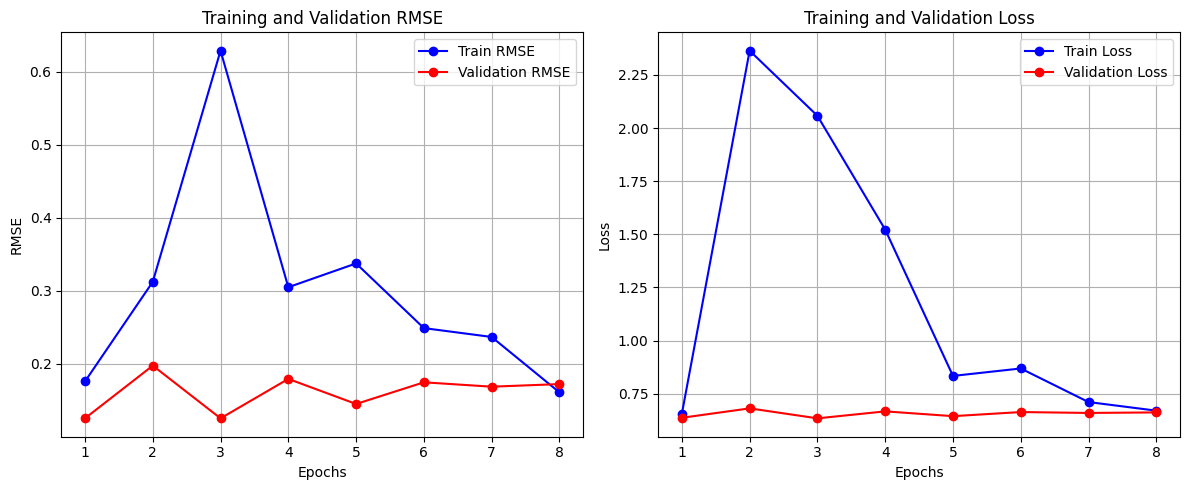

In [42]:
print("\n" + "="*50 + " Training Visualization " + "="*50)

# Mengambil nilai RMSE dari history
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Mengambil nilai loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_rmse) + 1)

plt.figure(figsize=(12, 5))

# Plot RMSE
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, plot pertama
plt.plot(epochs, train_rmse, 'bo-', label='Train RMSE')
plt.plot(epochs, val_rmse, 'ro-', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2) # 1 baris, 2 kolom, plot kedua
plt.plot(epochs, train_loss, 'bo-', label='Train Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

## Generating Recommendations

In [43]:
print("\n" + "="*50 + " Generating Recommendations " + "="*50)

def get_recommendations(user_id, model=model, top_n=10):
    """
    Memberikan rekomendasi produk untuk user tertentu

    Parameters:
    - user_id: ID user yang ingin direkomendasikan
    - model: Model yang akan digunakan untuk prediksi
    - top_n: Jumlah rekomendasi yang diinginkan

    Returns:
    - DataFrame berisi produk rekomendasi
    - Pesan error jika user tidak ditemukan
    """
    try:
        # Encode user_id
        user_encoded = user_to_idx[user_id]

        # Dapatkan produk yang sudah pernah di-rating user
        rated_products = rating_data[rating_data['user_id'] == user_id]['product_id'].values

        # Dapatkan semua produk yang belum di-rating
        all_products = product_data['product_id'].unique()
        unrated_products = [p for p in all_products if p not in rated_products]

        # Filter produk yang ada di mapping
        valid_products = [p for p in unrated_products if p in product_to_idx]

        # Siapkan input untuk model
        user_product_array = np.column_stack((
            [user_encoded] * len(valid_products),
            [product_to_idx[p] for p in valid_products]
        ))

        # Prediksi rating
        predictions = model.predict(user_product_array).flatten()

        # Ambil top_n rekomendasi
        top_indices = predictions.argsort()[-top_n:][::-1]
        recommended_product_ids = [valid_products[i] for i in top_indices]

        # Kembalikan informasi produk
        recommendations = product_data[
            product_data['product_id'].isin(recommended_product_ids)
        ][['product_id', 'product_name', 'category', 'sub_category']]

        return recommendations.drop_duplicates().reset_index(drop=True)


    except KeyError:
        return f"User '{user_id}' tidak ditemukan dalam database."

# Contoh penggunaan
sample_user = rating_data['user_id'].sample(1).iloc[0]
print(f"\nRecommendations for user {sample_user}:")
display(get_recommendations(sample_user))


================================================== Generating Recommendations ==================================================

Recommendations for user AHXVJ4RECEDVRCX2R7BYOMRO7KJQ,AEUNZGZ7IQFCJEFHU647HB57FC2Q,AEUWYI55HVW2GO4GRLWK4PWCTPLQ,AEDRDM7OTIWIAOWELAEAITODC4EA,AEDZ4OLR66LZO57XWMR6F43K736A,AEIXRXVWCR62IELG44BI5F7ZZUSQ,AFMCGE5U34NNKT2AGRY5TPX4OHKQ,AEFVX5GYQ6Y5MQSA25IP2FM2ZKTA:
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


,product_id,product_name,category,sub_category
0,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,USBCables
1,B09C6HXFC1,Duracell USB Lightning Apple Certified (Mfi) B...,Computers&Accessories|Accessories&Peripherals|...,USBCables
2,B01M4GGIVU,Tizum High Speed HDMI Cable with Ethernet | Su...,"Electronics|HomeTheater,TV&Video|Accessories|C...",HDMICables
3,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,Computers&Accessories|Accessories&Peripherals|...,USBCables
4,B01GGKYKQM,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,Computers&Accessories|Accessories&Peripherals|...,USBCables
5,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,Computers&Accessories|Accessories&Peripherals|...,USBCables
6,B00P93X6EK,Classmate Soft Cover 6 Subject Spiral Binding ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,WireboundNotebooks
7,B08LT9BMPP,Logitech G102 USB Light Sync Gaming Mouse with...,Computers&Accessories|Accessories&Peripherals|...,GamingMice
8,B0BR4F878Q,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",InstantWaterHeaters
9,B09P1MFKG1,Melbon VM-905 2000-Watt Room Heater (ISI Certi...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",FanHeaters


Output di atas menampilkan hasil dari proses "Generating Recommendations" menggunakan model *Collaborative Filtering*:

*   **`Recommendations for user ...`**: Ini menunjukkan ID pengguna acak yang dipilih untuk demonstrasi rekomendasi.
*   **`43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step`**: Ini adalah output dari proses `model.predict()`, menunjukkan bahwa model telah memproses 43 sampel (produk yang belum di-rating oleh pengguna) dalam 43 langkah (batch) dan memakan waktu sekitar 1 detik.

Daftar ini berisi 10 produk teratas yang diprediksi memiliki rating tertinggi oleh model untuk pengguna tersebut, tidak termasuk produk yang sudah pernah di-rating oleh pengguna tersebut.

## Evaluasi Tambahan

In [44]:
print("\n" + "="*50 + " Additional Evaluation " + "="*50)

def show_recommendations(user_id):
    """Fungsi tambahan untuk menampilkan rekomendasi dengan format lebih detail"""
    try:
        # Dapatkan produk yang sudah dibeli user
        product_bought = amazon[amazon['user_id'] == user_id]

        # Dapatkan produk yang belum dibeli
        all_products = amazon['product_id'].unique()
        product_not_bought = [p for p in all_products if p not in product_bought['product_id'].values]
        product_not_bought = [p for p in product_not_bought if p in product_to_idx]

        # Siapkan input untuk prediksi
        user_encoded = user_to_idx[user_id]
        user_product_array = np.column_stack((
            [user_encoded] * len(product_not_bought),
            [product_to_idx[p] for p in product_not_bought]
        ))

        # Prediksi rating
        ratings = model.predict(user_product_array).flatten()
        top_indices = ratings.argsort()[-10:][::-1]
        recommended_product_ids = [product_not_bought[i] for i in top_indices]

        # Tampilkan hasil
        print(f"Showing recommendations for user: {user_id}")
        print("="*30)

        # Produk dengan rating tinggi dari user
        print("Produk dengan rating tinggi dari user:")
        display(product_bought.sort_values('rating', ascending=False))

        # Rekomendasi produk
        print("\nTop 10 rekomendasi produk:")
        recommendations = amazon[
            amazon['product_id'].isin(recommended_product_ids)
        ][['product_name', 'category', 'rating']].drop_duplicates()

        return recommendations.sort_values('rating', ascending=False)

    except KeyError:
        return f"User '{user_id}' tidak ditemukan."

# Contoh penggunaan
sample_user = rating_data['user_id'].sample(1).iloc[0]
show_recommendations(sample_user)


================================================== Additional Evaluation ==================================================
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for user: AHSGCVKHDAXRUG4R7V3RB6WYLZCQ,AHFTHBS5KCQWNQIYBUXWLMS6VJNA,AGQAZKHJRJ44EBAFG5NLJWB6VORA,AHZO434YNBOOY33A2IHP3RCV6FOQ,AGNUIVLVQZXACC7UBK6KUYONSKFQ,AFHTHDZC4BOFGJAGPN5EGVLT76NQ,AGR7ZWKS6IANTUZJ26FNMG74IUOA,AF2NMGMO6GOFFYU3TYVZYX6KU25Q
Produk dengan rating tinggi dari user:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_weighted,sub_category,main_category
1415,B0756KCV5K,Prestige PIC 15.0+ 1900-Watt Induction Cooktop...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,3180.0,5295.0,0.4,4.2,6919.0,Concealed and feather touch buttons|Anti magne...,"AHSGCVKHDAXRUG4R7V3RB6WYLZCQ,AHFTHBS5KCQWNQIYB...","ASHFAK KHAN,Uday,Amazon Customer,Birendra Rai,...","R2QMIAMI841PRB,R13ESBS8Z3WZG0,RZ8HXGE2HU1O,R39...","Bad servisec,a bit costly,Favourite,Thankyou a...",Work nahi kar raha sahi karwane ke liye call n...,https://m.media-amazon.com/images/I/41jv4fqU1E...,https://www.amazon.in/Prestige-PIC-15-0-1900-W...,29059.8,InductionCooktop,Home&Kitchen



Top 10 rekomendasi produk:


,product_name,category,rating
235,Belkin USB C to USB-C Fast Charging Type C Cab...,Computers&Accessories|Accessories&Peripherals|...,4.5
20,Duracell USB Lightning Apple Certified (Mfi) B...,Computers&Accessories|Accessories&Peripherals|...,4.5
28,Duracell USB C To Lightning Apple Certified (M...,Computers&Accessories|Accessories&Peripherals|...,4.4
15,MI Braided USB Type-C Cable for Charging Adapt...,Computers&Accessories|Accessories&Peripherals|...,4.4
229,Agaro Blaze USBA to micro +Type C 2in1 Braided...,Computers&Accessories|Accessories&Peripherals|...,4.3
224,TATA SKY HD Connection with 1 month basic pack...,"Electronics|HomeTheater,TV&Video|SatelliteEqui...",4.3
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2
25,Tizum High Speed HDMI Cable with Ethernet | Su...,"Electronics|HomeTheater,TV&Video|Accessories|C...",4.2
252,Storite High Speed Micro USB 3.0 Cable A to Mi...,Computers&Accessories|Accessories&Peripherals|...,4.2


Output di atas menampilkan hasil dari proses "Additional Evaluation" menggunakan model *Collaborative Filtering*:

*   **`Showing recommendations for user: ...`**: Ini menampilkan ID pengguna sampel yang dipilih untuk analisis tambahan.
*   **`Produk dengan rating tinggi dari user:`**: Bagian ini menampilkan daftar produk yang sebelumnya diberi rating tinggi oleh pengguna sampel tersebut. Informasi ini berguna untuk memahami preferensi historis pengguna dan membandingkannya dengan rekomendasi yang dihasilkan.
*   **`Top 10 rekomendasi produk:`**: Bagian ini menampilkan 10 produk teratas yang direkomendasikan oleh model Collaborative Filtering untuk pengguna sampel tersebut. Rekomendasi ini didasarkan pada prediksi model tentang produk mana yang kemungkinan akan disukai oleh pengguna, tidak termasuk produk yang sudah pernah diberi rating oleh pengguna.

Tabel di bawah "Top 10 rekomendasi produk" berisi kolom `product_name`, `category`, dan `rating` untuk produk-produk yang direkomendasikan. Dapat melihat nama produk, kategori produk, dan rating rata-rata produk tersebut di dataset.